
 Dataset Overview:
Shape: 891 rows x 15 columns


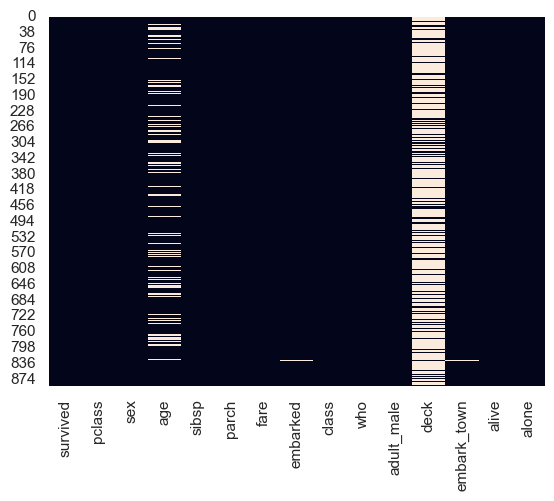

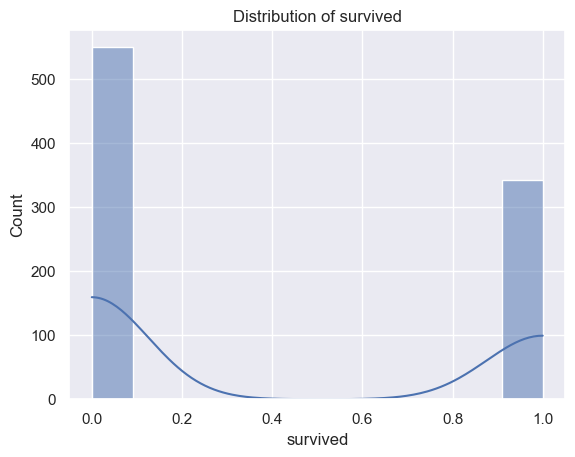

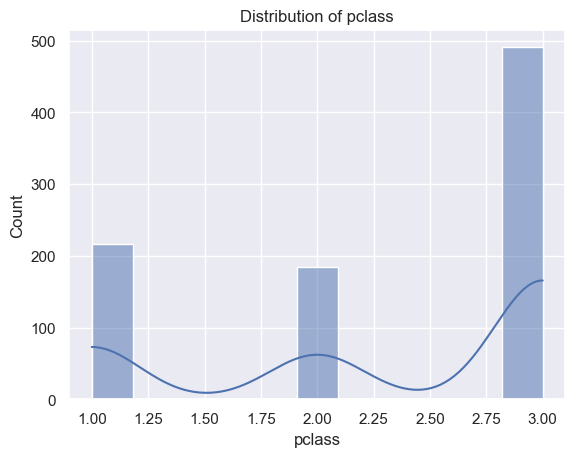

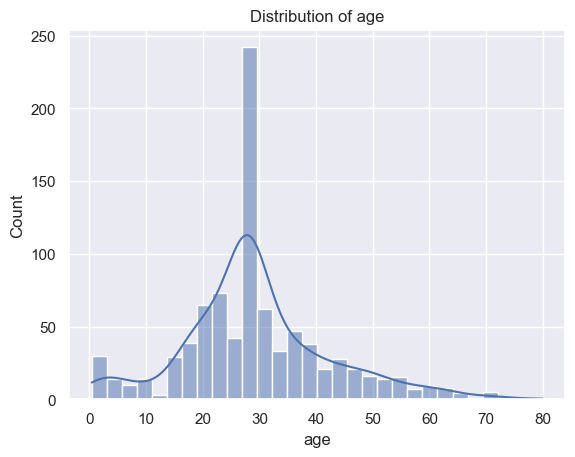

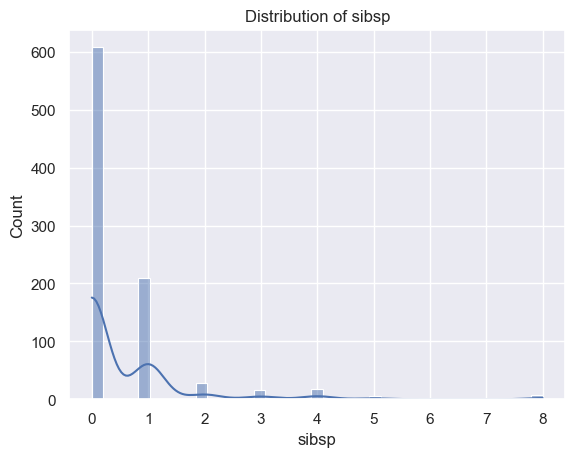

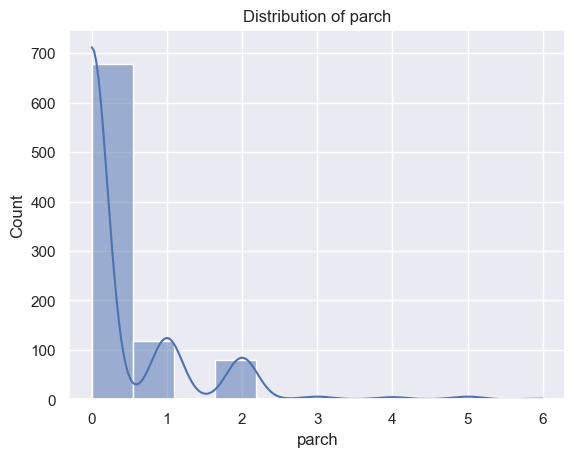

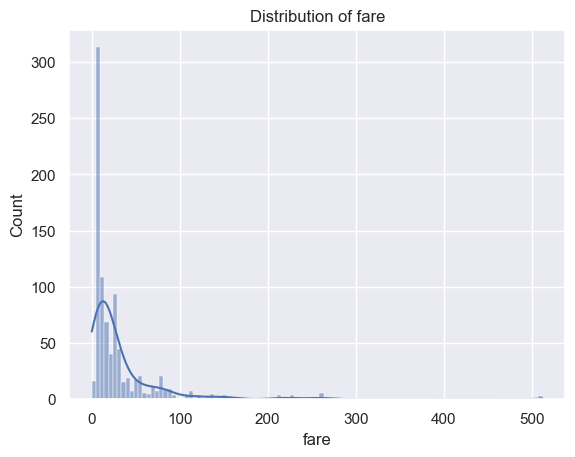

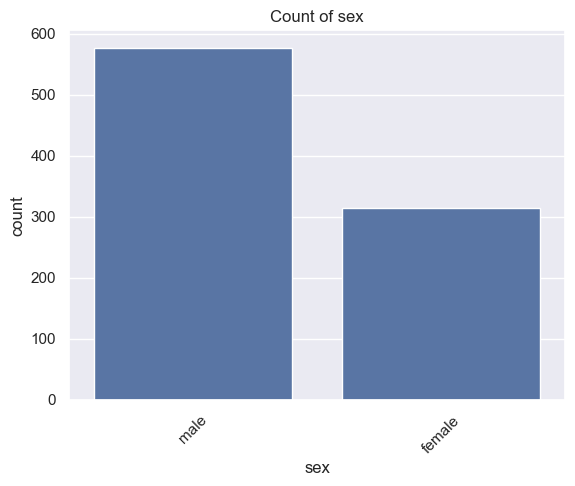

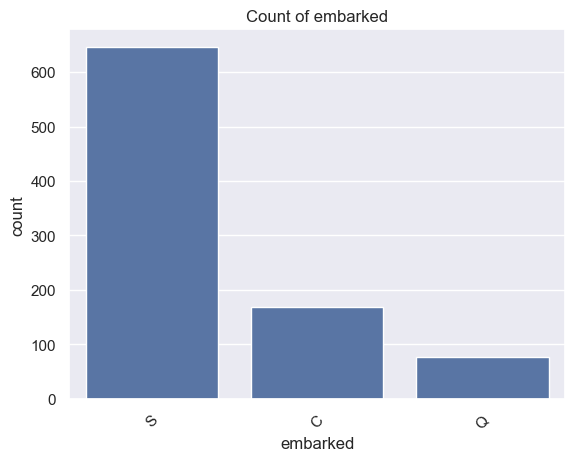

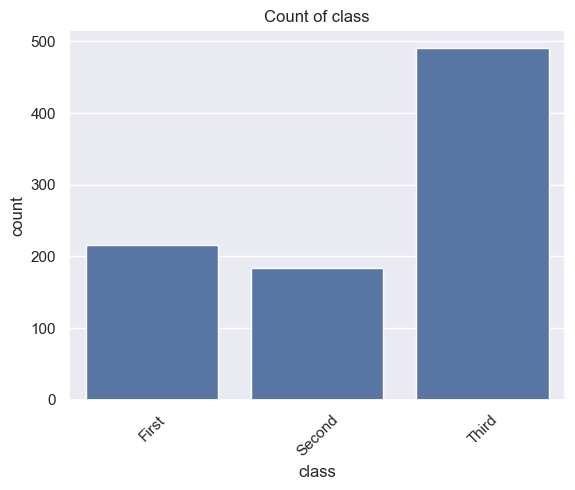

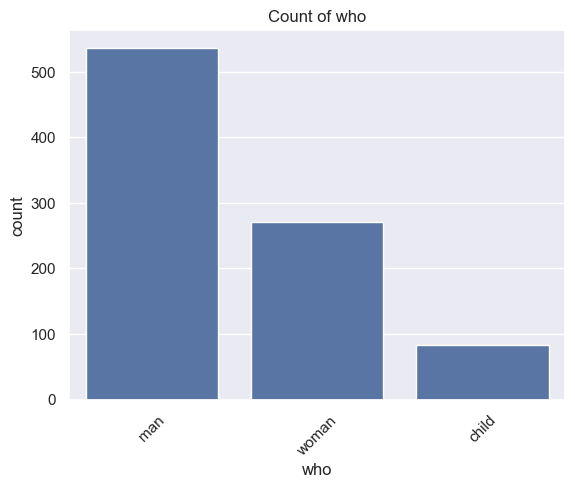

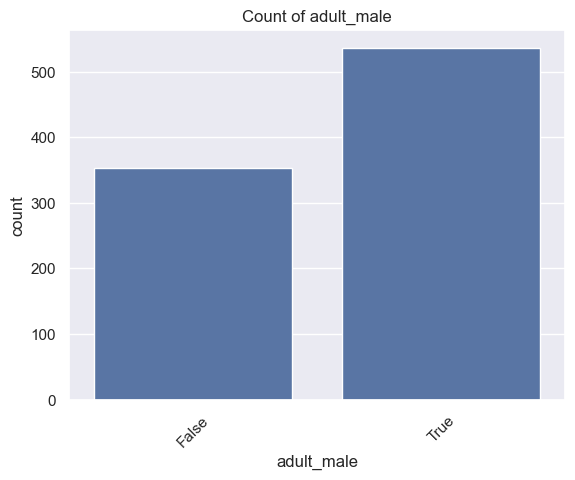

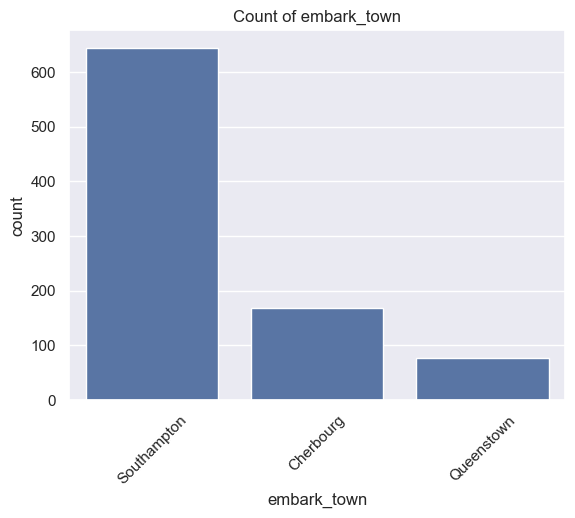

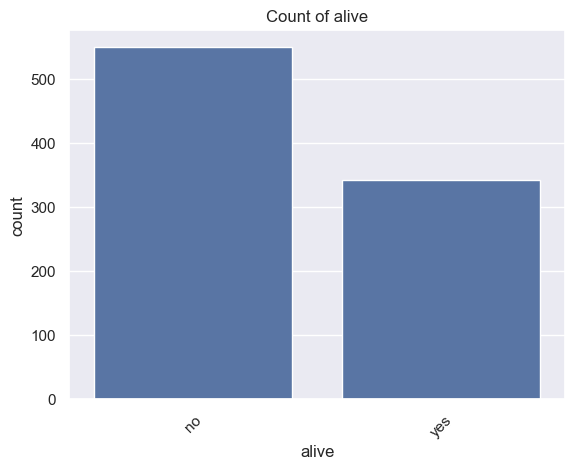

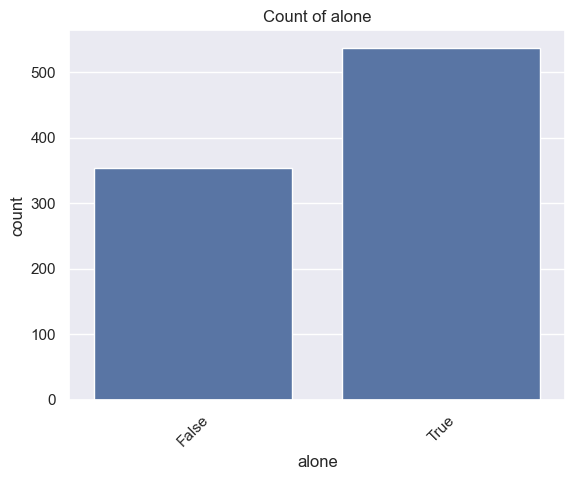

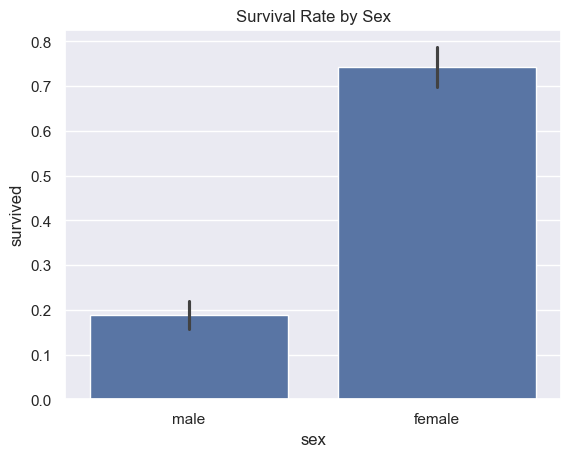

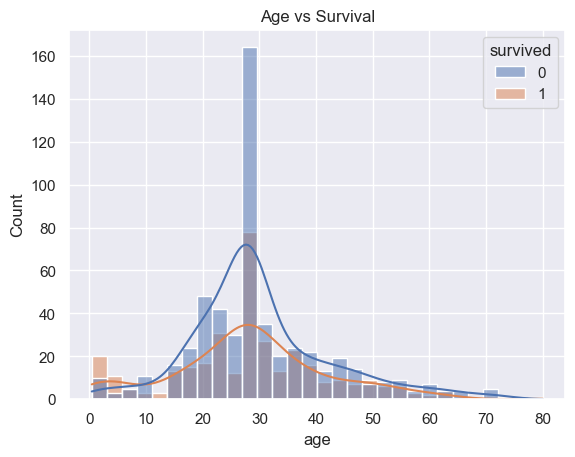

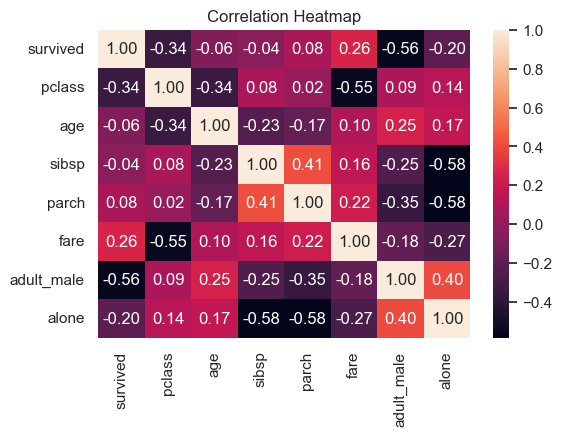

In [8]:
# Project Title : Exploratory Data Analysis (EDA) on a Public Dataset
# Author : Shama P S
# Description : This project performs EDA on a publicly available dataset to identify trends, patterns, and insights
# Tools Used : Python, Pandas, Matplotlib, Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.set_option('display.max_columns',None)
df=sns.load_dataset('titanic')
print("\n Dataset Overview:")
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
df.head()
df.shape
df.describe(include='all')
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.show()
df_clean = df.copy()

# Drop high-missing columns
df_clean = df_clean.drop(columns=['deck'])

# Fill missing values
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])

# Remove rows with missing fare
df_clean = df_clean.dropna(subset=['fare'])
# Numeric variables
num_cols = df_clean.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
# Categorical variables
cat_cols = df_clean.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()
    # Survival rate by sex
sns.barplot(x='sex', y='survived', data=df_clean)
plt.title('Survival Rate by Sex')
plt.show()

# Age vs Survived
sns.histplot(data=df_clean, x='age', hue='survived', kde=True)
plt.title('Age vs Survival')
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()